### Assignment 3 - Data Stewardship

## Deadline:  December 12, 23:59  [y.he2@uva.nl](mailto:y.he2@uva.nl)

## Upload your notebook file on Canvas

|**Name** | **Student id** | **email**|
|:- |:-|:-|
|narendra parigi | 12089265 | naren.parigi@gmail.com|

I (enlisted above) declare that:
1. My assignment will be my own work.
2. I shall not make solutions to the assignment available to anyone else.
3. I shall not engage in any other activities that will dishonestly improve my results or dishonestly improve or hurt the results of others.

Note:
- your notebook should give no errors when executed as "Run All" cells
- ** Use markdown cell setting for comments/additional explanation **

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import NaN
import scipy.stats as stats
from pandas import Series, DataFrame
import pandas as pd
plt.rc('figure', figsize=(10, 6))
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')

# <font color='blue'>Question 1 [7 points] - Cleaning the scraped Nobel Prize dataset</font>

The first part of this assignment consists of finding and eliminating dirty data in the Nobel Prize dataset. The final aim is to have a cleaned dataset that is ready to be explored by EDA.
The following points can be considered:  
   
1. The first Nobel was awarded in 1901. Remove the earlier records.  

2. Replace empty strings, i.e. <tt>''</tt>, with <tt>NaN</tt>

3. Some names are marked with an asterisk, denoting that these winners are recorded by country of birth, not country at the time of winning the prize. Clean up those names by removing the asterisks and strip any remaining whitespace. You may need to input ```'\*'``` for an asterisk string if you use the **contains** method. Generate a flag variable that equals 1 if the country is the country of birth.

4. Some names are duplicated. This could indicate that some people have won the Nobel Prize more than once. However, it could also be that a winner is "claimed" by more than one country. Remove all real duplicates. For instance, Marie Curie is contained 4 times: twice for Poland and twice for France. Remove 2 of them (you have to make a choice here: remove winners country alphabetically of not?)

5. Consider the missing values in the field <font color='blue'>category</font>. Are they really missing or just entry mistakes? [You don't have to complete missing values]  

6. Is there an explanation of the missing values of the field <font color='blue'>gender</font>? Remove all records without gender.

7. What about missing values for <font color='blue'>date_of_birth</font>?  

Note: all changes should be made within this notebook. So, *no* alterations may be made to the input file outside this notebook (e.g. by using a file editor). When you have a choice, please <font color='red'>motivate</font>. *Show that you are aware of the consequences of your decision* (sometimes there is no right/wrong).

### Read Data

In [3]:
df_nobel = pd.read_json("nobel_winners.json")
df_ratings = pd.read_csv("JudgeRatings.csv")

In [4]:
df_nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052 entries, 0 to 1051
Data columns (total 12 columns):
born_in           1052 non-null object
category          1052 non-null object
country           1052 non-null object
date_of_birth     1044 non-null object
date_of_death     1044 non-null object
gender            1040 non-null object
link              1052 non-null object
name              1052 non-null object
place_of_birth    1044 non-null object
place_of_death    1044 non-null object
text              1052 non-null object
year              1052 non-null int64
dtypes: int64(1), object(11)
memory usage: 98.7+ KB


In [5]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 13 columns):
JUDGE    43 non-null object
CONT     43 non-null float64
INTG     43 non-null float64
DMNR     43 non-null float64
DILG     43 non-null float64
CFMG     43 non-null float64
DECI     43 non-null float64
PREP     43 non-null float64
FAMI     43 non-null float64
ORAL     43 non-null float64
WRIT     43 non-null float64
PHYS     43 non-null float64
RTEN     43 non-null float64
dtypes: float64(12), object(1)
memory usage: 4.4+ KB


In [6]:
(df_nobel.shape, df_ratings.shape)

((1052, 12), (43, 13))

### Question 1

In [7]:
df_nobel_fil = df_nobel[df_nobel['year'] >= 1901]

In [8]:
df_nobel_fil.sort_values(by=['year']).head(2)

,born_in,category,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text,year
67,,Physics,Germany,27 March 1845,10 February 1923,male,http://en.wikipedia.org/wiki/Wilhelm_Conrad_R%...,Wilhelm Conrad Röntgen,"Lennep , Prussia","Munich , Germany","Wilhelm Conrad Röntgen , Physics, 1901",1901
909,,Peace,France,8 May 1828,30 October 1910,male,http://en.wikipedia.org/wiki/Henry_Dunant,Henry Dunant,"Geneva , Switzerland","Heiden, Switzerland","Henry Dunant , Peace, 1901",1901


In [9]:
print ('The size of the nobel dataframe after filtering records {0}'.format(df_nobel_fil.shape[0]))

The size of the nobel dataframe after filtering records 1049


### Question 2

In [10]:
print("The following columns have an empty string as value")
for column in df_nobel_fil.columns:
    if (df_nobel_fil[column] == '').any():
        print(column)

The following columns have an empty string as value
born_in
category
country
date_of_birth
date_of_death
place_of_birth
place_of_death


In [11]:
df_nobel_fil.replace('', np.nan, inplace=True)

In [12]:
print("no columns have an empty string as value after replacement")
for column in df_nobel_fil.columns:
    if (df_nobel_fil[column] == '').any():
        print(column)

no columns have an empty string as value after replacement


All columns with empty string as value are replaced by np.nan.

### Question 3

In [13]:
df_nobel_fil[df_nobel_fil['name'].str.contains('\*', regex=True)==True].shape

(142, 12)

In [14]:
df_nobel_fil['flag_country_check'] = df_nobel_fil['name'].str.contains('\*', regex=True).astype(int)

In [15]:
df_nobel_fil['flag_country_check'].value_counts()

0    907
1    142
Name: flag_country_check, dtype: int64

In [16]:
df_nobel_fil.head(3)

,born_in,category,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text,year,flag_country_check
0,NaN,Physiology or Medicine,Argentina,8 October 1927,24 March 2002,male,http://en.wikipedia.org/wiki/C%C3%A9sar_Milstein,César Milstein,"Bahía Blanca , Argentina","Cambridge , England","César Milstein , Physiology or Medicine, 1984",1984,0
1,Bosnia and Herzegovina,Literature,NaN,9 October 1892,13 March 1975,male,http://en.wikipedia.org/wiki/Ivo_Andric,Ivo Andric *,"Dolac (village near Travnik), Austria-Hungary ...","Belgrade, SR Serbia, SFR Yugoslavia (present-d...","Ivo Andric *, born in then Austria–Hungary ,...",1961,1
2,Bosnia and Herzegovina,Chemistry,NaN,"July 23, 1906",1998-01-07,male,http://en.wikipedia.org/wiki/Vladimir_Prelog,Vladimir Prelog *,"Sarajevo , Bosnia and Herzegovina , then part...","Zürich , Switzerland","Vladimir Prelog *, born in then Austria–Hung...",1975,1


In [17]:
df_nobel_fil['name'] = df_nobel_fil['name'].replace('\*', '', regex=True).str.strip()

In [18]:
df_nobel_fil.head(3)

,born_in,category,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text,year,flag_country_check
0,NaN,Physiology or Medicine,Argentina,8 October 1927,24 March 2002,male,http://en.wikipedia.org/wiki/C%C3%A9sar_Milstein,César Milstein,"Bahía Blanca , Argentina","Cambridge , England","César Milstein , Physiology or Medicine, 1984",1984,0
1,Bosnia and Herzegovina,Literature,NaN,9 October 1892,13 March 1975,male,http://en.wikipedia.org/wiki/Ivo_Andric,Ivo Andric,"Dolac (village near Travnik), Austria-Hungary ...","Belgrade, SR Serbia, SFR Yugoslavia (present-d...","Ivo Andric *, born in then Austria–Hungary ,...",1961,1
2,Bosnia and Herzegovina,Chemistry,NaN,"July 23, 1906",1998-01-07,male,http://en.wikipedia.org/wiki/Vladimir_Prelog,Vladimir Prelog,"Sarajevo , Bosnia and Herzegovina , then part...","Zürich , Switzerland","Vladimir Prelog *, born in then Austria–Hung...",1975,1


In total 142 entries contain a name with a asterisks (*) and a flag is generated to represent a section. The asterisks are removed and column values are stripped for whitespaces.

### Question 4

In [19]:
df_nobel_fil[df_nobel_fil['name'].str.contains('Curie') & df_nobel_fil['name'].str.contains('Marie')]

,born_in,category,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text,year,flag_country_check
706,NaN,Physics,Poland,7 November 1867,4 July 1934,female,http://en.wikipedia.org/wiki/Marie_Curie,Marie Skłodowska-Curie,"Warsaw , Poland","Sancellemoz , France","Marie Skłodowska-Curie , born in partitioned ...",1903,0
709,NaN,Chemistry,Poland,7 November 1867,4 July 1934,female,http://en.wikipedia.org/wiki/Marie_Curie,Marie Skłodowska-Curie,"Warsaw , Poland","Sancellemoz , France","Marie Skłodowska-Curie , born in partitioned ...",1911,0
910,NaN,Physics,France,7 November 1867,4 July 1934,female,http://en.wikipedia.org/wiki/Marie_Curie,Marie Curie,"Warsaw , Poland","Sancellemoz , France","Marie Curie , born in then Russian Empire, no...",1903,0
919,NaN,Chemistry,France,7 November 1867,4 July 1934,female,http://en.wikipedia.org/wiki/Marie_Curie,Marie Curie,"Warsaw , Poland","Sancellemoz , France","Marie Curie , born in then Russian Empire, no...",1911,0


In [20]:
df_nobel_fil_dedup = df_nobel_fil.sort_values(by=['country']).drop_duplicates(
    subset=['category', 'date_of_birth', 'gender','year'], 
    keep='first')

In [21]:
df_nobel_fil_dedup.shape

(874, 13)

In [22]:
df_nobel_fil_dedup[df_nobel_fil_dedup['name'].str.contains('Curie') &
                   df_nobel_fil_dedup['name'].str.contains('Marie')]

,born_in,category,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text,year,flag_country_check
910,NaN,Physics,France,7 November 1867,4 July 1934,female,http://en.wikipedia.org/wiki/Marie_Curie,Marie Curie,"Warsaw , Poland","Sancellemoz , France","Marie Curie , born in then Russian Empire, no...",1903,0
919,NaN,Chemistry,France,7 November 1867,4 July 1934,female,http://en.wikipedia.org/wiki/Marie_Curie,Marie Curie,"Warsaw , Poland","Sancellemoz , France","Marie Curie , born in then Russian Empire, no...",1911,0


The sub-set of columns category, date of birth, gender and year used to exclude duplicates as the category, date of birth, gender and year combination of columns must be identical, although the country and name differ in the entries.

Note: we can also use date_of_death, place_of_birth, place_of_death as sub-set columns but the combination category, date of birth, gender and year is already unique (verified with current dataset). The solution does not work if the nobel price is shared by two people who born on the same date of birth.

### Question 5

In [23]:
df_nobel_fil_dedup['category'].value_counts()

Physiology or Medicine    206
Physics                   200
Chemistry                 169
Literature                110
Peace                     109
Economics                  74
Name: category, dtype: int64

In [24]:
df_nobel_fil_dedup[df_nobel_fil_dedup['category'].isna() | df_nobel_fil_dedup['category'].isnull()]

,born_in,category,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text,year,flag_country_check
922,NaN,NaN,France,28 June 1873,5 November 1944,male,http://en.wikipedia.org/wiki/Alexis_Carrel,Alexis Carrel,"Sainte-Foy-lès-Lyon , Rhône , France",NaN,"Alexis Carrel , Medicine, 1912",1912,0
104,Lithuania,NaN,NaN,"November 30, 1926",NaN,male,http://en.wikipedia.org/wiki/Andrew_Schally,Andrew Schally,"Vilnius , Second Polish Republic",NaN,"Andrew Schally *, born in then Poland, now Li...",1977,1
712,Poland,NaN,NaN,"November 30, 1926",NaN,male,http://en.wikipedia.org/wiki/Andrew_Schally,Andrew Schally,"Vilnius , Second Polish Republic",NaN,"Andrew Schally *, born in Wilno, Second Polis...",1976,1
812,India,NaN,NaN,"January 9, 1922","November 9, 2011",male,http://en.wikipedia.org/wiki/Hargobind_Khorana,Hargobind Khorana,"Raipur , Punjab , Pakistan","Concord, Massachusetts , U.S.","Hargobind Khorana *, born in Kabirwala , Bri...",1968,1
815,India,NaN,NaN,3 November 1933,NaN,male,http://en.wikipedia.org/wiki/Amartya_Sen,Amartya Sen,"Dhaka , Bangladesh",NaN,"Amartya Sen *, Economic Sciences, 1998",1998,1
820,Hungary,NaN,NaN,22 April 1876,8 April 1936,male,http://en.wikipedia.org/wiki/Robert_B%C3%A1r%C...,Robert Bárány,"Vienna , Austria-Hungary","Uppsala , Sweden","Robert Bárány *, born in then Austria-Hungary...",1914,1


The six entries in the column of category are filled with nan values. The actual values in the json file are empty strings and have been replaced by np.nan as part of the question (2). This is certainly a data entry error, as, for example, Amartya Sen won the Nobel Prize in Economics.

### Question 6

In [25]:
df_nobel_fil_dedup['gender'].value_counts()

male      818
female     47
Name: gender, dtype: int64

In [26]:
df_nobel_fil_dedup[df_nobel_fil_dedup['gender'].isnull() | df_nobel_fil_dedup['gender'].isna()]

,born_in,category,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text,year,flag_country_check
1033,NaN,Peace,Austria,None,None,None,http://en.wikipedia.org/wiki/International_Ato...,International Atomic Energy Agency,None,None,"International Atomic Energy Agency , Peace, 2005",2005,0
3,NaN,Peace,Belgium,None,None,None,http://en.wikipedia.org/wiki/Institut_de_Droit...,Institut de Droit International,None,None,"Institut de Droit International , Peace, 1904",1904,0
1000,NaN,Peace,Canada,None,None,None,http://en.wikipedia.org/wiki/Pugwash_Conferenc...,Pugwash Conferences on Science and World Affairs,None,None,Pugwash Conferences on Science and World Affai...,1995,0
947,NaN,Peace,France,None,None,None,http://en.wikipedia.org/wiki/M%C3%A9decins_San...,Médecins Sans Frontières,None,None,"Médecins Sans Frontières , Peace, 1999",1999,0
650,NaN,Physiology or Medicine,Sweden,"October 30, 1900","March 12, 1991",None,http://en.wikipedia.org/wiki/Ragnar_Granit,Ragnar Granit,"Helsinki , Finland","Stockholm , Sweden","Ragnar Granit , born in then Russian Empire, ...",1967,0
574,NaN,Peace,United Kingdom,None,None,None,http://en.wikipedia.org/wiki/Amnesty_Internati...,Amnesty International,None,None,"Amnesty International , Peace, 1977",1977,0
156,NaN,Peace,United Kingdom,None,None,None,http://en.wikipedia.org/wiki/Friends_Service_C...,Friends Service Council,None,None,"Friends Service Council , Peace, 1947",1947,0
696,Russia,Physics,NaN,23 August 1974,NaN,None,http://en.wikipedia.org/wiki/Konstantin_Novoselov,Konstantin Novoselov,"Nizhny Tagil , Russian SFSR , Soviet Union",NaN,"Konstantin Novoselov *, Physics, 2010",2010,1
989,Canada,Physiology or Medicine,NaN,"September 22, 1901","January 12, 1997",None,http://en.wikipedia.org/wiki/Charles_Brenton_H...,Charles B. Huggins,"Halifax, Nova Scotia","Chicago, Illinois","Charles B. Huggins *, Physiology or Medicine, ...",1966,1


In [27]:
df_nobel_fil_dedup.dropna(subset=['gender'], inplace=True)
df_nobel_fil_dedup.shape

(865, 13)

There are 9 gender incomplete entries. 6 out of 9 entries have no gender as they serve non-personal institutes, but 3 out of 9 are gender missing, may be data entry problem.

### Question7 

In [28]:
df_nobel_fil_dedup[df_nobel_fil_dedup['date_of_birth'].isnull() | df_nobel_fil_dedup['date_of_birth'].isna()]

,born_in,category,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text,year,flag_country_check
782,NaN,Physics,Japan,NaN,NaN,male,http://en.wikipedia.org/wiki/Hiroshi_Amano,Hiroshi Amano,NaN,NaN,"Hiroshi Amano , Physics, 2014",2014,0


There is 1 entry with missing date_of_birth. This could also be a problem with data entry.

# <font color='blue'>Question 2 [3 points] - US Judge Ratings</font>

In the file <tt>JudgeRatings.csv</tt>, you can find the information about Lawyers' ratings of state judges in the US Superior Court. The file contains 43 observations on 12 numeric variables.

- CONT 	Number of contacts of lawyer with judge.
- INTG 	Judicial integrity.
- DMNR 	Demeanor.
- DILG 	Diligence.
- CFMG 	Case flow managing.
- DECI 	Prompt decisions.
- PREP 	Preparation for trial.
- FAMI 	Familiarity with law.
- ORAL 	Sound oral rulings.
- WRIT 	Sound written rulings.
- PHYS 	Physical ability.
- RTEN 	Worthy of retention.


1. Apply PCA to the 12 components after standardizing. Determine how many components to use based on (motivate you answers):
 - Eigenvalue Criterion
 - Proportion of Variance Explained Criterion (use a minimum of 90% variability)
  
  
2. Display the component matrix, that is, the correlation matrix between the features and the components. Round off the values to 2 decimal places. 

3. Comment on the above results.

 # Question 1

In [61]:
df_ratings.shape

(43, 13)

In [62]:
X=df_ratings.drop('JUDGE',axis=1)

In [63]:
from sklearn.decomposition import PCA
from scipy.stats import zscore
pca1 = PCA()
X_z=X.apply(zscore) # standardize features
X_pca=pca1.fit_transform(X_z) # fit PCs

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Number of Components')

Text(0, 0.5, 'Variance (%)')

Text(0.5, 1.0, 'JudgeRatings Dataset Explained Variance')

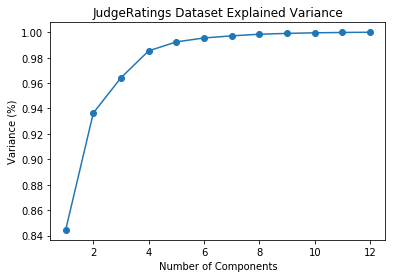

In [64]:
plt.figure()
plt.plot(range(1,pca1.n_components_+1),np.cumsum(pca1.explained_variance_ratio_),marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('JudgeRatings Dataset Explained Variance')
plt.show()

On the basis of the cumulative explained variance, PC_1 and PC_2 explain most of the variance (94% approx.) in the dataset. Thus, considering the first two PCs, an accurate representation of the data would be created.

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Component')

Text(0, 0.5, 'Eigenvalue')

Text(0.5, 1.0, 'JudgeRatings Dataset Eigenvalues')

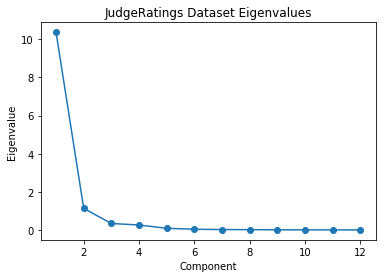

In [65]:
plt.figure()
plt.plot(range(1,pca1.n_components_+1),pca1.explained_variance_,marker='o')
plt.xlabel("Component")
plt.ylabel("Eigenvalue")
plt.title('JudgeRatings Dataset Eigenvalues')
plt.show()

On the basis of the eigenvalues, PC_1 and PC_2 have eignevalue greater than 1 and in above scree plot between component and eigenvalue the elbow ben
ds after PC_2. Thus, considering the first two PCs, an accurate representation of the data would be created.

# Question 2

In [66]:
weight_pca=pd.DataFrame(pca1.components_.T,columns=['PC_{}'.format(i) for i in range(1, pca1.n_components_+1)],index=X.columns)
weight_pca

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12
CONT,0.003075,0.932891,-0.334757,0.058577,-0.093438,-0.004064,0.005215,-0.060066,0.025145,0.030389,0.014533,-0.007941
INTG,-0.288551,-0.182041,-0.549360,0.173977,0.014544,0.369937,-0.449811,0.334165,0.275378,-0.108976,-0.112554,0.009849
DMNR,-0.286884,-0.197566,-0.556490,-0.124412,0.228833,-0.394725,0.466748,-0.247097,0.199100,0.072413,0.134323,0.059122
DILG,-0.304354,0.036305,0.163630,0.321396,0.301937,0.598676,0.209711,-0.354859,-0.039772,0.383392,0.070952,0.053790
CFMG,-0.302573,0.168394,0.207342,0.012949,0.448431,-0.085729,0.246903,0.713526,-0.143425,-0.098503,0.165868,0.025083
DECI,-0.301892,0.127877,0.297903,0.030492,0.424003,-0.392609,-0.536430,-0.302423,0.258238,-0.067438,-0.128500,0.044142
PREP,-0.309406,0.032230,0.151869,0.213656,-0.202853,0.083217,0.335390,-0.153675,0.108769,-0.679863,-0.318761,-0.273287
FAMI,-0.306680,-0.001315,0.195290,0.200651,-0.507470,-0.101539,-0.036378,0.020389,0.223066,-0.040046,0.573363,0.421740
ORAL,-0.312708,-0.003626,0.002151,-0.007441,-0.246059,-0.150272,0.057580,0.090630,-0.299517,0.255995,-0.638606,0.494391
WRIT,-0.311061,-0.031379,0.056046,0.137105,-0.305563,-0.238172,-0.060900,0.126120,-0.024973,0.474783,0.000406,-0.696107


In [78]:
X_pca=pd.DataFrame(X_pca,columns=['PC_{}'.format(i) for i in range(1, pca1.n_components_+1)])
# covariance matrix and rounded for presentation convenience
ComMatrix=X_z.join(X_pca).corr().filter(X_pca.columns).drop(X_pca.columns).round(2)
ComMatrix

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12
CONT,0.01,0.98,-0.19,0.03,-0.03,-0.00,0.00,-0.01,0.00,0.00,0.00,-0.00
INTG,-0.92,-0.19,-0.32,0.09,0.00,0.07,-0.06,0.04,0.02,-0.01,-0.01,0.00
DMNR,-0.91,-0.21,-0.32,-0.06,0.07,-0.08,0.07,-0.03,0.02,0.01,0.01,0.00
DILG,-0.97,0.04,0.09,0.16,0.09,0.12,0.03,-0.04,-0.00,0.03,0.00,0.00
CFMG,-0.96,0.18,0.12,0.01,0.13,-0.02,0.03,0.09,-0.01,-0.01,0.01,0.00
DECI,-0.96,0.13,0.17,0.02,0.12,-0.08,-0.08,-0.04,0.02,-0.01,-0.01,0.00
PREP,-0.98,0.03,0.09,0.11,-0.06,0.02,0.05,-0.02,0.01,-0.05,-0.02,-0.01
FAMI,-0.98,-0.00,0.11,0.10,-0.15,-0.02,-0.01,0.00,0.02,-0.00,0.03,0.02
ORAL,-1.00,-0.00,0.00,-0.00,-0.07,-0.03,0.01,0.01,-0.03,0.02,-0.04,0.02
WRIT,-0.99,-0.03,0.03,0.07,-0.09,-0.05,-0.01,0.02,-0.00,0.04,0.00,-0.03


# Question 3

Based on the matrix, PC 1 is highly correlated with predictors relative to other components This also supports the stated variance, as PC 1 can explain approximately 85 percent of the variance in the dataset.